# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Cella Schnabel

**ID**: rms428

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Desktop/BEE4750/hw/hw01/hw1-rms428`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [2]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings
using Statistics
using Plots

In [3]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

### Problem 1.1 Answer
- The logical error in this code is that if there is no value in the array_values array that is smaller than zero, the function will never go through the if statement to update the variable min_value, so the min_value returned will be zero, rather than the minimum value of the array.
- I've updated the code so that min_value is set to be the first value of the array. That way it can successful iterate through the array and return the minimum value.
- The minimum value is 78.

In [4]:
function minimum(array)
    min_value = array[1]
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

### Problem 1.2 Answer
- The logical error in this code is calulating the mean of the global variable (student_grades) rather than the local variable defined in the scope of the function (grades). Another error is implemeting the mean function before loading the Statistics package. The final error is attempting to show average_grade, another local variable defined in the scope of the function. 
- I've updated the code so that you load the Statistics package, use the local variable (grades) throughout the function, and finally call the function on student_grades to get the average student grade. 
- The average grade is 94.4.

In [5]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(grades)
  return average_grade
end

@show class_average(student_grades);

class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

### Problem 1.3 Answer
- There is a syntax error in this code where instead of writing zeros(n_trails) to make an array of zeros called outcomes to fill in, it calls zero(n_trials).
- I changes zero(n_trails) to zeros(n_trials).
- The probability of winning is 0.369.

In [6]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zeros(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins

0.382

### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

## Problem 2 Answer
- The purpose of this function is to return an array of the unique values of a given array (which may have duplicate values).
- A built-in Julia function is the function unique()

In [7]:
function mystery_function(values)
    y = []
    for v in values
        # if v is not in y, append v to y
        if !(v in y) 
            append!(y, v)
        end
    end
    # return array of unique values from values
    return y 
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


In [8]:
unique(list_of_values)

4-element Vector{Int64}:
 1
 2
 3
 4

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

## Problem 3 Answer

In [9]:
function compute_mean(v)
    # sums all elements of a vector and returns the mean
    sum = 0
    count= 0
    for i in v
        sum = sum + i
        count = count + 1
    end
    mean = sum/count
    return mean
end

compute_mean (generic function with 1 method)

In [10]:
# make a random vector of length 10
random_vect = rand(10)
random_vect_mean = compute_mean(random_vect)
# subtract mean from each element of vector
subtracted = random_vect .- random_vect_mean
# check mean is close to zero 
compute_mean(subtracted)

4.4408920985006264e-17

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

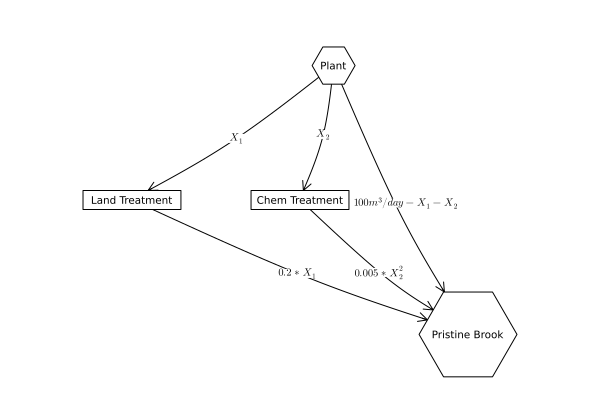

In [20]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"$X_1$", (1,3) => L"$X_2$", (1, 4) => L"       $100m^3/day - X_1 - X_2$",(2, 4) => L"$0.2 * X_1 $",(3, 4) => L"$0.005*X_2^2$")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

Where $X_1$ is the amount of YUK in wastewater sent to the Land Treatment,
      $X_2$ is the YUK and wastewater sent to the Chemical treatment,
      and from the Plant to Pristine Brook directly is the untreated YUK wastewater.

In [32]:
function total_cost_and_yuk(x,y)
    # plant makes 100m3/day of wastewater; the 3 flows but equal the plants outflow
    z = wastewater - x - y
    # method 1: to land treatment
    # removes 80% of YUK based on flowrate x
    method_1_yuk = 0.2 * x * YUK
    method_1_cost = x^2 / 20 # dollars per day

    # method 2: to chemical plant
    # removes YUK at efficiency e based on flowrate y
    e = 1 - 0.005 * y
    method_2_yuk = y * YUK * (1-e)
    method_2_cost = 1.5*y # dollars per day
    
    # method 3: directly to Pristine Brook (do nothing)
    # flowrate z
    method_3_yuk = z * YUK
    method_3_cost = 0 # free to not treat

    total_cost = method_1_cost + method_2_cost
    total_yuk = method_1_yuk + method_2_yuk + method_3_yuk

    return (total_cost, total_yuk)

end

total_cost_and_yuk (generic function with 1 method)

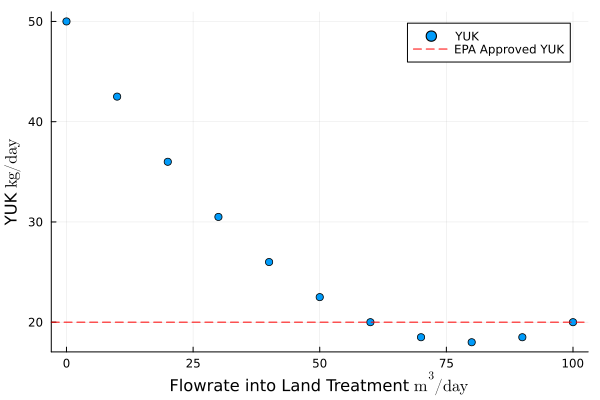

In [46]:
# site specific constants
wastewater = 100
YUK = 1

# selected flowrate combinations to land and chemical treatment, respectively
combos = [(0, 100), (10, 90), (20, 80), (30, 70), (40, 60), (50, 50), (60, 40), (70, 30), (80, 20), (90, 10), (100, 0)]

final_yuk = []
final_cost = []
x_vals = []
y_vals = []

for i in combos
    x, y = i
    total_cost, total_yuk = total_cost_and_yuk(x, y)
    append!(final_yuk, total_yuk)
    append!(final_cost, total_cost)
    append!(x_vals, x)
    append!(y_vals, y)
end

scatter(x_vals, final_yuk, label = "YUK", xlabel = L"Flowrate into Land Treatment $\mathrm{m}^3/\mathrm{day}$", ylabel = L"YUK $\mathrm{kg/day}$")
hline!([20], label="EPA Approved YUK", linestyle=:dash, color=:red)

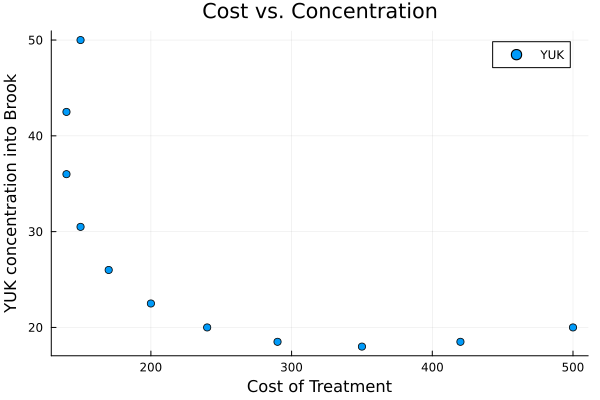

In [47]:
scatter(final_cost, final_yuk, label = "YUK",xlabel = "Cost of Treatment", ylabel = "YUK concentration into Brook", title = "Cost vs. Concentration")

In [70]:
min = minimum(final_yuk)
for i in 1:length(final_yuk)
    if final_yuk[i] == min
        print("The minimum YUK effluent I found requires " * string(x_vals[i]) * " cubic meters/day sent to the Land Treatment and \n" * 
        string(y_vals[i]) * " cubic meters/day sent to the Chemical Treatment.\n" * "\n" *
        "This treatment plan costs \$" * string(final_cost[i]) * "/day and results in " * string(final_yuk[i]) * " kg of YUK/day entering Pristine Brook")

    end
end

The minimum YUK effluent I found requires 80 cubic meters/day sent to the Land Treatment and 
20 cubic meters/day sent to the Chemical Treatment.

This treatment plan costs $350.0/day and results in 18.0 kg of YUK/day entering Pristine Brook

## Problem 4 Answer
Let $X$, $Y$, and $Z$ be wastewater flowrates from the Plant to the Land Treatment, Chemical Treatment, and Brook, respecitively. 

The cost of the Land Treatment is $X^2/20$ and the final YUK concentration from the Land Treatment outflow is $0.2*X$.

The cost of the Chemical Treatment is $1.50 * Y$ and the final YUK concentration from the Chemical Treatment is found from the efficiency, e, such that

$e = 1 - 0.005Y$

$YUK = (1 - (1 - 0.005*Y))*Y$

$YUK = 0.005Y^2$

The total cost and YUK outflow is the sum of the cost and YUK outflow from each treatment.

The three wastewater flowrates cannot exceed the wastewater that the Plant produces. Therefore,

$X + Y + Z = 100 \mathrm{m}^3/\mathrm{day}$


**My solution**:

I would send 80 $\mathrm{m}^3/\mathrm{day}$ to the Land Treatment and 20 $\mathrm{m}^3/\mathrm{day}$ to the Chemical Treatment. I would not send any wastewater directly to Pristine Brook from the Plant. This wastewater treatment plan costs \$350/day. 

From the Cost vs. Concentration graph, you can see that, generally, the YUK concentration tends to decrease as the treatment cost tends to increase.

In order to find an optimal solution, the goal of the wastewater treatment system would have to be outlined. For example, if the goal is to just dip below the EPA standard of 20 kg/day of YUK at a minimal expense, then the optimal solution would be different than if the goal is to minimize the amount of YUK entering Pristine Brook each day. 

## References

List any external references consulted, including classmates.